In [126]:
#Imports - not all were used
from scipy.stats.stats import pearsonr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
from sklearn.metrics import confusion_matrix
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D 
#dataset of differentially expressed circRNAs is hepatocellular carcinoma - filtered in Strong Correlation code

circ = pd.read_csv("/Users/kbhaskar/Desktop/GEO database/significantCircsDraft1 copy.csv", index_col=0)


circ.describe()


,Tumor,ASCRP3001251,ASCRP3006821,ASCRP3008985,ASCRP3009102,ASCRP3000013,ASCRP3000155,ASCRP3001458,ASCRP3004690,ASCRP3005209,ASCRP3006726,ASCRP3007627,ASCRP3011276
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,0.500000,5.387426,6.840846,5.639045,5.877160,5.442453,5.388426,6.123116,5.901645,6.041413,6.167930,9.180257,5.362667
std,0.502571,0.511329,0.887800,0.513798,0.479595,0.580817,0.476530,1.089387,0.654057,0.445532,0.621745,1.470884,0.575484
min,0.000000,4.539072,4.655518,4.429041,5.048770,4.508920,4.488178,4.536743,4.595330,4.998473,4.807403,5.918609,4.551843
25%,0.000000,4.981207,6.243330,5.368214,5.578882,4.966039,5.015752,5.126144,5.406361,5.742526,5.707608,7.916419,4.863148
50%,0.500000,5.285436,6.701271,5.560983,5.788083,5.328999,5.333237,6.068893,5.918166,6.082553,6.182727,9.241471,5.231369
75%,1.000000,5.770815,7.367132,5.992143,6.196279,5.884904,5.715910,7.001011,6.408113,6.348515,6.629127,10.267652,5.738573
max,1.000000,6.813130,9.670380,7.020277,7.187518,6.918616,6.570148,8.480313,7.147452,6.940158,7.464785,12.274722,7.096707


In [127]:
circ.head()

,Tumor,ASCRP3001251,ASCRP3006821,ASCRP3008985,ASCRP3009102,ASCRP3000013,ASCRP3000155,ASCRP3001458,ASCRP3004690,ASCRP3005209,ASCRP3006726,ASCRP3007627,ASCRP3011276
Sample,,,,,,,,,,,,,
GSM4716745,0,4.793425,4.793425,5.696123,5.364268,6.918616,6.570148,6.229621,6.130916,6.755378,6.605690,7.538901,6.892867
GSM4716746,1,5.323065,6.408359,5.616325,5.855476,5.394929,5.119417,6.151560,5.835151,5.518229,6.116537,7.323408,5.946130
GSM4716747,0,4.711968,6.108404,5.565447,5.871828,5.656489,5.707211,6.976011,6.894172,6.843566,6.989216,10.084522,6.525039
GSM4716748,1,5.404494,6.794016,6.378238,6.698555,4.885511,4.837186,5.338034,4.837186,5.404494,5.584661,8.349676,4.643916
GSM4716749,0,4.969787,5.910117,4.718528,5.238497,6.525900,6.496562,6.407637,6.536702,6.940158,6.628252,10.949031,6.245824


In [128]:
from sklearn.utils import shuffle
# shuffle to prevent bias
circ = shuffle(circ, random_state=69)

In [129]:
circ.head(50)

,Tumor,ASCRP3001251,ASCRP3006821,ASCRP3008985,ASCRP3009102,ASCRP3000013,ASCRP3000155,ASCRP3001458,ASCRP3004690,ASCRP3005209,ASCRP3006726,ASCRP3007627,ASCRP3011276
Sample,,,,,,,,,,,,,
GSM4716817,0,4.991234,6.720165,5.563618,5.582331,5.974972,5.656203,7.408960,6.470769,6.302716,6.810755,10.276531,5.643345
GSM4716776,1,5.836919,6.935392,6.456178,6.710865,4.964482,5.315482,5.693895,6.377805,6.200933,6.413530,10.200162,5.669585
GSM4716758,1,5.353634,7.003313,5.796740,6.202305,5.353634,5.409421,5.243075,5.485040,5.299091,5.590062,7.262839,4.951502
GSM4716827,0,5.171468,6.609020,5.434488,5.790367,5.307130,5.242313,6.103167,6.305957,6.092213,6.522060,9.267885,5.351520
GSM4716778,1,5.483993,7.880497,6.275086,6.697305,4.954397,4.780648,5.244788,5.058315,5.410185,5.371517,7.841748,4.780648
GSM4716753,0,4.838952,6.099069,5.423020,5.648315,6.099069,6.209829,6.529419,7.147452,6.668413,7.219161,11.485940,5.572891
GSM4716771,0,5.000953,6.133487,5.405516,5.643561,5.556739,5.405516,6.692431,7.008700,6.008188,7.464785,9.929827,5.643561
GSM4716832,1,5.885314,7.355961,5.118172,5.461498,4.555175,4.749371,5.274526,5.404324,6.078402,5.762004,9.675665,4.661659
GSM4716809,0,5.107665,5.872813,5.198224,5.466156,6.143674,5.708177,7.335696,6.448393,5.691455,6.762073,9.037627,5.636546


In [130]:
#create a dict to keep track of the accuracy of each model
accuracies = {}
#X will contain circRNA values, y will contain target variable - tumor
X = circ.values
y = circ['Tumor'].values
X = np.delete(X,0,axis=1)
#split the dataset into 70-30 for training and testing
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=1)
scoreList = []
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  
knn.fit(x_train, y_train)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test, y_test)*100))
knn_predictions = knn.predict(x_test)
scoreList.append(knn.score(x_test, y_test))
acc = max(scoreList)*100
accuracies['KNN'] = acc
confusion_matrix(y_test, knn_predictions)


2 NN Score: 83.33%


array([[15,  1],
       [ 4, 10]])

In [131]:
knn_predictions


array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0])

In [132]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 500, random_state = 2)
rf.fit(x_train, y_train)
acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))
rf_predictions = rf.predict(x_test)
confusion_matrix(y_test, rf_predictions)

Random Forest Algorithm Accuracy Score : 96.67%


array([[16,  0],
       [ 1, 13]])

In [133]:
#desicion tree 
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 3)
dtc.fit(x_train, y_train)
acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))
dtc_predictions = dtc.predict(x_test)
confusion_matrix(y_test, dtc_predictions)

Decision Tree Test Accuracy 73.33%


array([[11,  5],
       [ 3, 11]])

In [134]:
#support vector machine
from sklearn.svm import SVC
svm = SVC(random_state = 4)
svm=SVC(probability=True)

svm.fit(x_train, y_train)
acc = svm.score(x_test,y_test)*100
accuracies['SVM'] = acc
svm_predictions = svm.predict(x_test)
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))
confusion_matrix(y_test, svm_predictions)

Test Accuracy of SVM Algorithm: 96.67%


array([[15,  1],
       [ 0, 14]])

In [135]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
acc = nb.score(x_test,y_test)*100
accuracies['Naive Bayes'] = acc
nb_predictions = nb.predict(x_test)
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))
confusion_matrix(y_test, nb_predictions)


Accuracy of Naive Bayes: 96.67%


array([[15,  1],
       [ 0, 14]])

In [136]:
#gradient boost
from sklearn import ensemble
gb = ensemble.GradientBoostingClassifier()
gb.fit(x_train, y_train)
acc = gb.score(x_test,y_test)*100
accuracies['Gradient Boosting'] = acc
gb_predictions = gb.predict(x_test)
print("Accuracy of Gradient Boosting: {:.2f}%".format(acc))
confusion_matrix(y_test, gb_predictions)

Accuracy of Gradient Boosting: 90.00%


array([[15,  1],
       [ 2, 12]])

In [137]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
acc = lr.score(x_test,y_test)*100
accuracies['Logistic Regression'] = acc
lr_predictions = lr.predict(x_test)
print("Accuracy of Logistic Regression: {:.2f}%".format(acc))
confusion_matrix(y_test, lr_predictions)

Accuracy of Logistic Regression: 100.00%


array([[16,  0],
       [ 0, 14]])

/Users/kbhaskar/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kbhaskar/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kbhaskar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1374, in fit
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/kbhaskar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of I

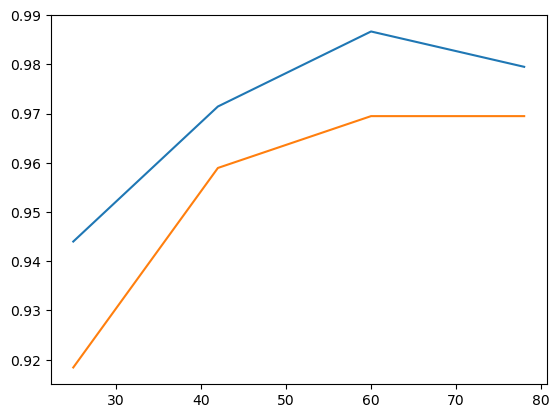

In [138]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(lr, X, y, cv=5,return_times=True)
plt.style.use('default')
plt.plot(train_sizes,np.mean(train_scores,axis=1))
plt.plot(train_sizes,np.mean(test_scores,axis=1))

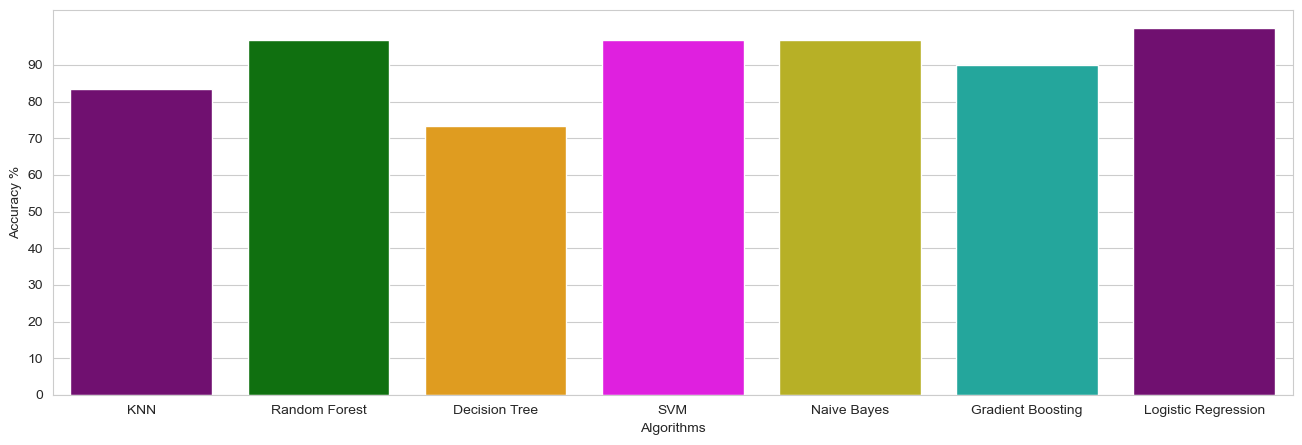

In [140]:
#graph accuracy of each model
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [215]:
print(accuracies)

{'KNN': 83.33333333333334, 'Random Forest': 96.66666666666667, 'Decision Tree': 73.33333333333333, 'SVM': 96.66666666666667, 'Naive Bayes': 96.66666666666667, 'Gradient Boosting': 90.0, 'Logistic Regression': 100.0}


In [141]:
#obtain probability for all classifiers
r_probs = [0 for _ in range (len(y_test))]
rf_probs = rf.predict_proba(x_test)
nb_probs = nb.predict_proba(x_test)
knn_probs = knn.predict_proba(x_test)
dtc_probs = knn.predict_proba(x_test)
svm_probs = svm.predict_proba(x_test)
gb_probs = gb.predict_proba(x_test)
lr_probs = lr.predict_proba(x_test)

In [142]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
knn_probs = knn_probs[:, 1]
dtc_probs = dtc_probs[:, 1]
svm_probs = svm_probs[:, 1]
gb_probs = gb_probs[:, 1]
lr_probs = lr_probs[:, 1]

In [143]:
from sklearn.metrics import roc_curve, roc_auc_score
#calculate AUC score
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
knn_auc = roc_auc_score(y_test,knn_probs)
dtc_auc = roc_auc_score(y_test,dtc_probs)
svm_auc = roc_auc_score(y_test,svm_probs)
gb_auc = roc_auc_score(y_test,gb_probs)
lr_auc = roc_auc_score(y_test,lr_probs)

In [144]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('K nearest Neighbor: AUROC = %.3f' % (knn_auc))
print('Desicion Tree: AUROC = %.3f' % (dtc_auc))
print('Support Vector Machine: AUROC = %.3f' % (svm_auc))
print('Gradient Boosting: AUROC = %.3f' % (gb_auc))
print('Logistic Regression: AUROC = %.3f' % (lr_auc))


Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 1.000
Naive Bayes: AUROC = 0.987
K nearest Neighbor: AUROC = 0.960
Desicion Tree: AUROC = 0.960
Support Vector Machine: AUROC = 1.000
Gradient Boosting: AUROC = 0.942
Logistic Regression: AUROC = 1.000


In [145]:
#calculate true postive rate and false positive rate for classifiers
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

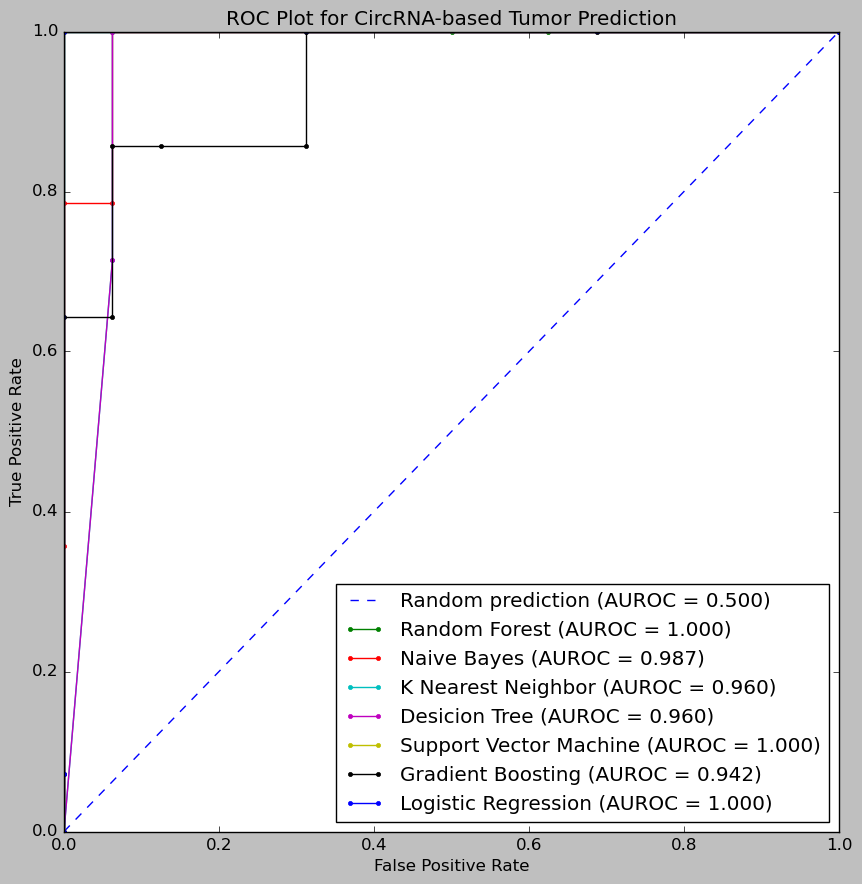

In [146]:
#plot
plt.style.use('classic')
plt.figure(figsize=(10, 10), dpi=100)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='K Nearest Neighbor (AUROC = %0.3f)' % knn_auc)
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='Desicion Tree (AUROC = %0.3f)' % dtc_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='Support Vector Machine (AUROC = %0.3f)' % svm_auc)
plt.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boosting (AUROC = %0.3f)' % gb_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)
# Title
plt.title('ROC Plot for CircRNA-based Tumor Prediction')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc = 'lower right' ) 
# Show plot
plt.show()

In [216]:
#get confusion matrices for classifiers
cm_lr = confusion_matrix(y_test,lr_predictions)
cm_knn = confusion_matrix(y_test,knn_predictions)
cm_svm = confusion_matrix(y_test,svm_predictions)
cm_nb = confusion_matrix(y_test,nb_predictions)
cm_dtc = confusion_matrix(y_test,dtc_predictions)
cm_rf = confusion_matrix(y_test,rf_predictions)
cm_gb = confusion_matrix(y_test,gb_predictions)



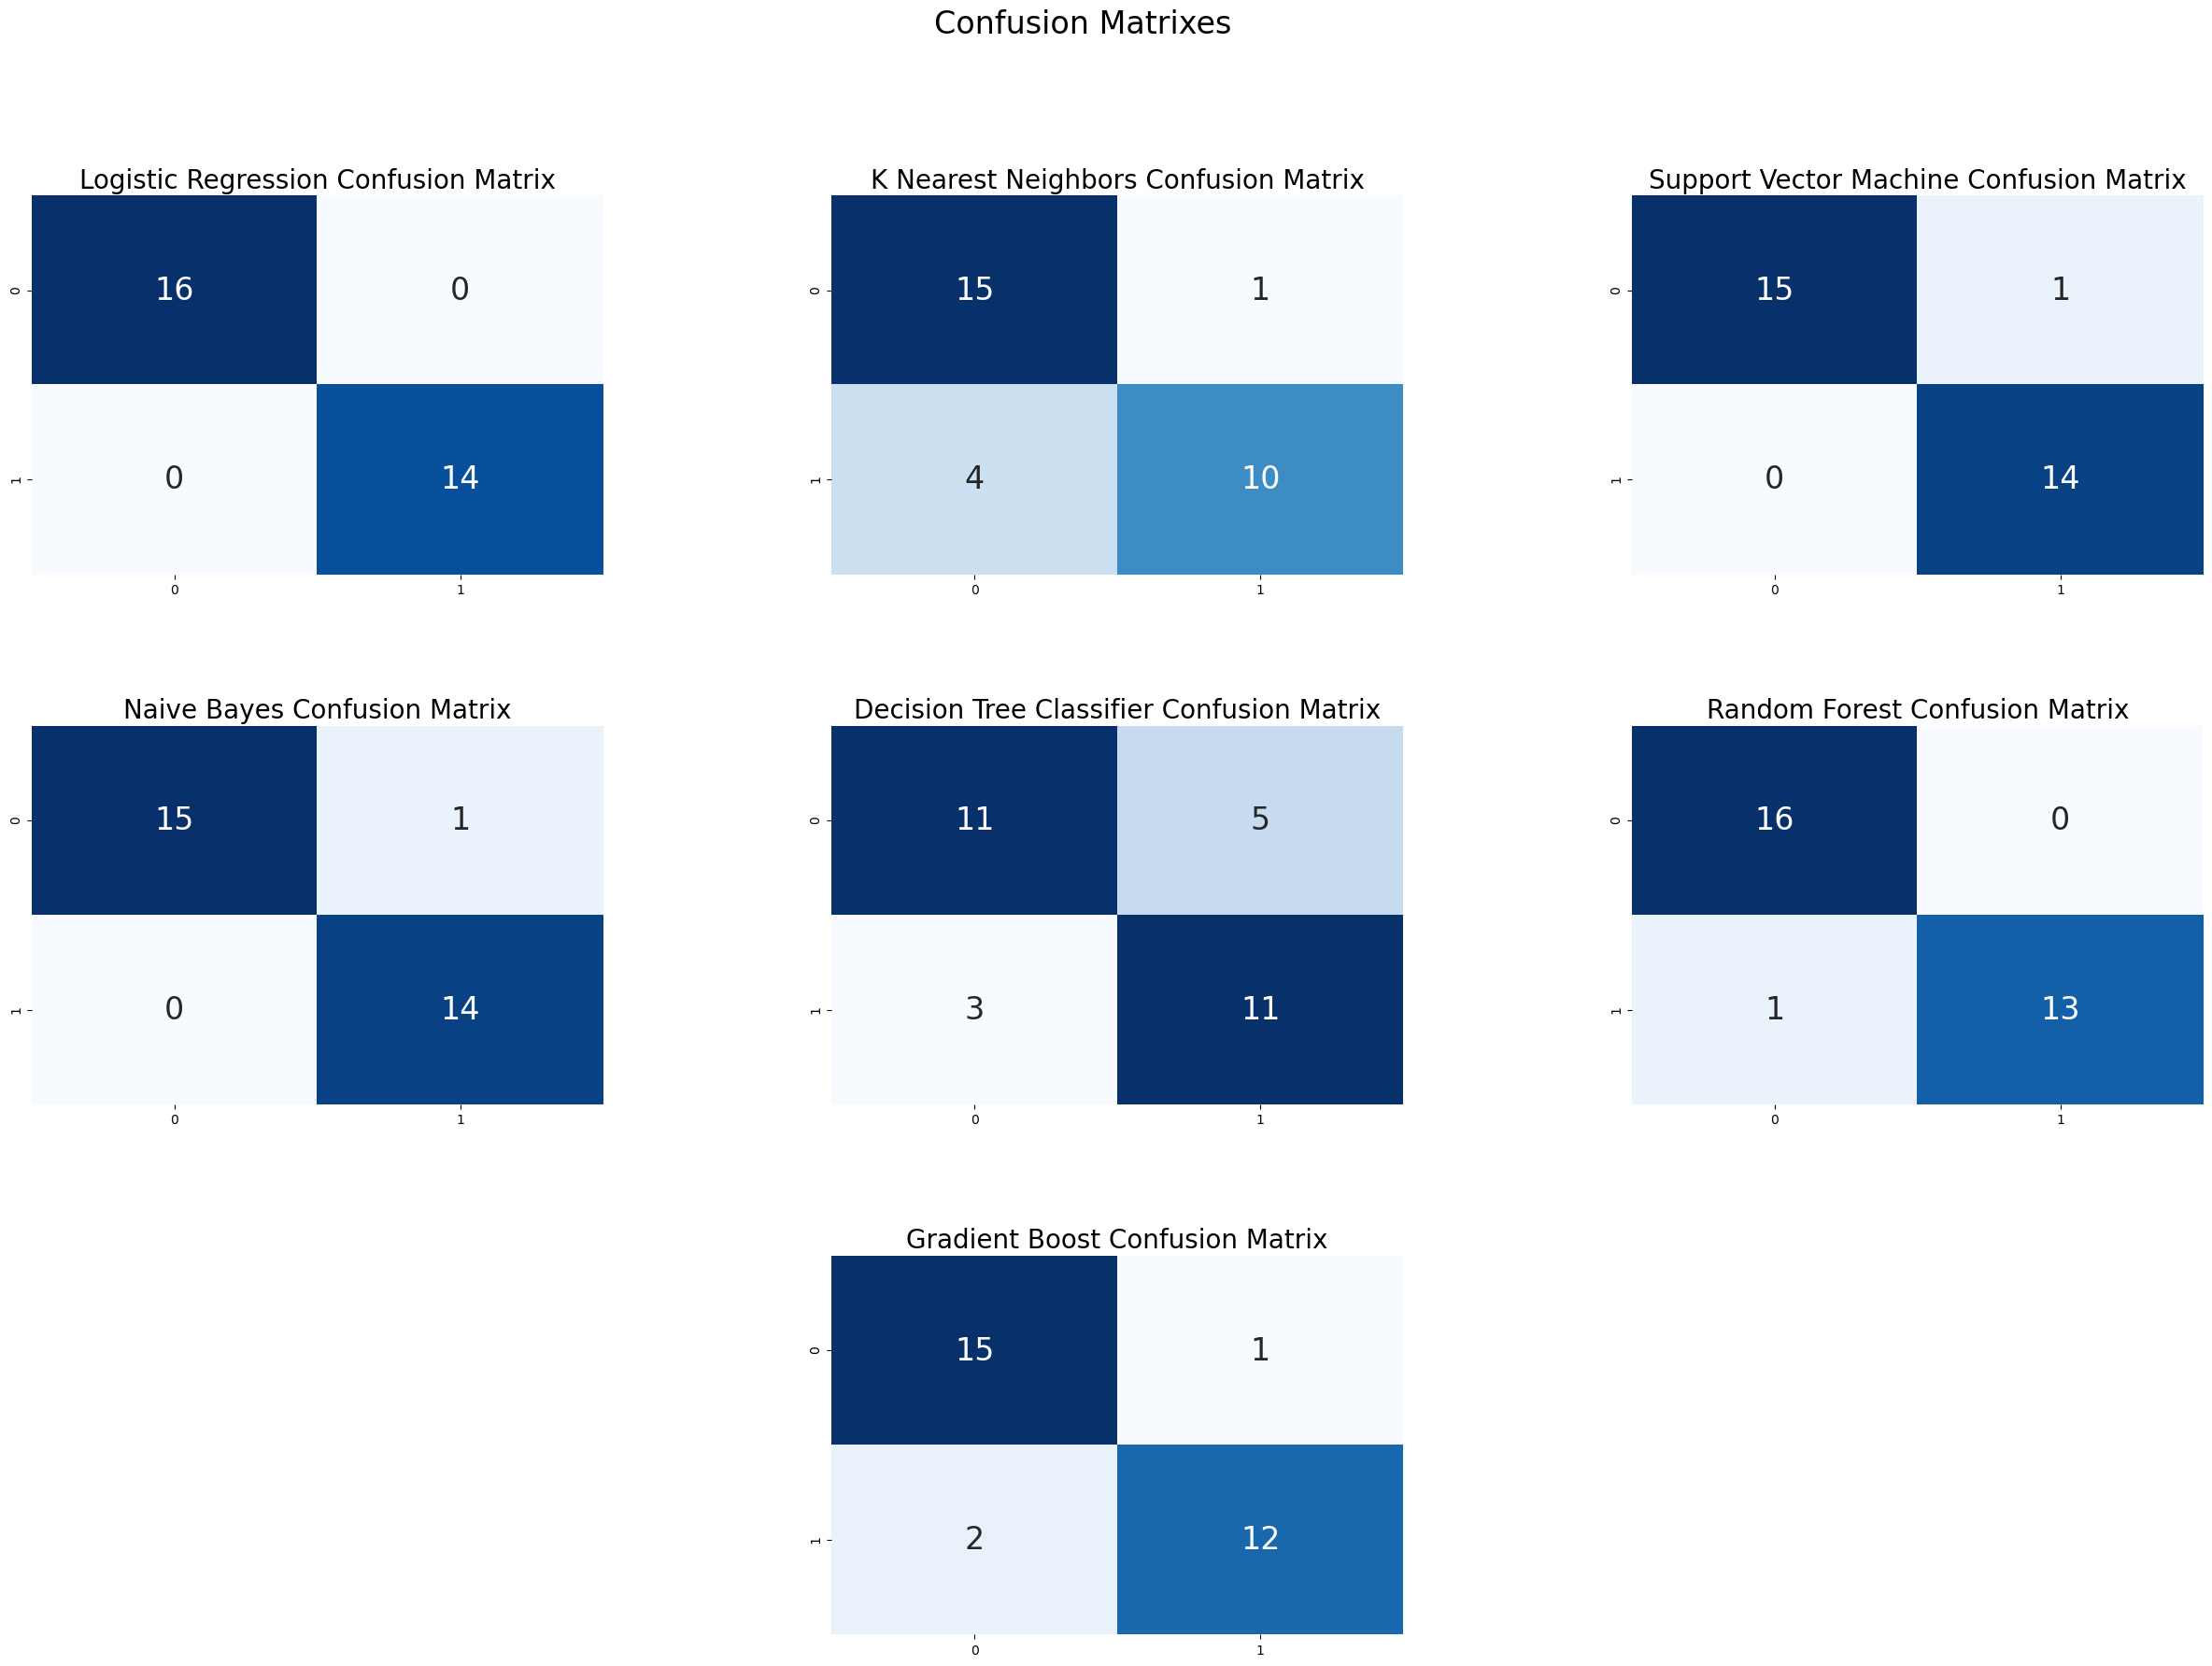

In [226]:

plt.figure(figsize=(30,20))
plt.style.use('default')
plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Logistic Regression Confusion Matrix",fontsize = 20)
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("K Nearest Neighbors Confusion Matrix", fontsize = 20)
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("Support Vector Machine Confusion Matrix", fontsize = 20)
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("Naive Bayes Confusion Matrix", fontsize = 20)
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Decision Tree Classifier Confusion Matrix", fontsize = 20)
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("Random Forest Confusion Matrix", fontsize = 20)
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,8)
plt.title("Gradient Boost Confusion Matrix", fontsize = 20)
sns.heatmap(cm_gb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()


In [149]:
#cross validation using cross val score
mean_scores = []
#cross validation
from sklearn.model_selection import cross_val_score
from statistics import mean
svm_score=cross_val_score(svm, X, y, cv=5)
mean_scores.append(svm_score.mean())
print("%0.2f accuracy for svm with a standard deviation of %0.2f" % (svm_score.mean(), svm_score.std()))

knn_score=cross_val_score(knn, X, y, cv=5)
mean_scores.append(knn_score.mean())
print("%0.2f accuracy for knn with a standard deviation of %0.2f" % (knn_score.mean(), knn_score.std()))

rf_score=cross_val_score(rf, X, y, cv=5)
mean_scores.append(rf_score.mean())
print("%0.2f accuracy for random forest with a standard deviation of %0.2f" % (rf_score.mean(), rf_score.std()))

nb_score=cross_val_score(nb, X, y, cv=5)
mean_scores.append(nb_score.mean())
print("%0.2f accuracy for naive bayes with a standard deviation of %0.2f" % (nb_score.mean(), nb_score.std()))

dtc_score=cross_val_score(dtc, X, y, cv=5)
mean_scores.append(dtc_score.mean())
print("%0.2f accuracy for decision tree with a standard deviation of %0.2f" % (dtc_score.mean(), dtc_score.std()))


gb_score=cross_val_score(gb, X, y, cv=5)
mean_scores.append(gb_score.mean())
print("%0.2f accuracy for gradient boost with a standard deviation of %0.2f" % (gb_score.mean(), gb_score.std()))

lr_score=cross_val_score(lr, X, y, cv=5)
mean_scores.append(lr_score.mean())
print("%0.2f accuracy for logistic regression with a standard deviation of %0.2f" % (lr_score.mean(), lr_score.std()))



0.97 accuracy for svm with a standard deviation of 0.02
0.90 accuracy for knn with a standard deviation of 0.05
0.97 accuracy for random forest with a standard deviation of 0.02
0.96 accuracy for naive bayes with a standard deviation of 0.04
0.89 accuracy for decision tree with a standard deviation of 0.04
0.91 accuracy for gradient boost with a standard deviation of 0.04
0.97 accuracy for logistic regression with a standard deviation of 0.02


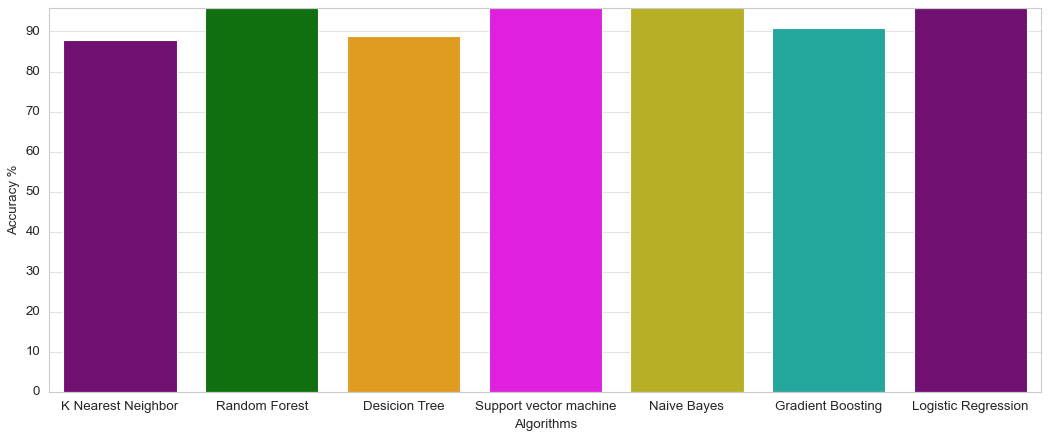

The accuracies are :
87.7840909090909 95.92803030303031 88.82575757575758 95.92803030303031 95.92803030303031 90.84595959595958 95.92803030303031


In [207]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
#stratified k-fold - splits test data into equal splits of 0s and 1s to prevent bias/overfitting
scores_svm =[]
scores_knn =[]
scores_rf =[]
scores_nb =[]
scores_dtc =[]
scores_gb =[]
scores_lr =[]
train1,test1,train2,test2 = 0,0,0,0
def getScore (model,train1,train2,test1,test2):
    model.fit(train1,train2)
    return model.score(test1,test2)
folds = StratifiedKFold(n_splits = 3)
for train_index, test_index in folds.split(X,y):
    train1,test1,train2,test2=X[train_index],X[test_index],y[train_index],y[test_index]
    scores_svm.append(getScore(svm,train1,train2,test1,test2))
    scores_knn.append(getScore(knn,train1,train2,test1,test2))
    scores_rf.append(getScore(rf,train1,train2,test1,test2))
    scores_nb.append(getScore(nb,train1,train2,test1,test2))
    scores_dtc.append(getScore(dtc,train1,train2,test1,test2))
    scores_gb.append(getScore(gb,train1,train2,test1,test2))
    scores_lr.append(getScore(lr,train1,train2,test1,test2))
svmScore = mean(scores_svm)*100
knnScore = mean(scores_knn)*100
rfScore = mean(scores_rf)*100
nbScore = mean(scores_nb)*100
dtcScore = mean(scores_dtc)*100
gbScore = mean(scores_gb)*100
lrScore = mean(scores_lr)*100
dic = {'K Nearest Neighbor':knnScore,'Random Forest' : rfScore, 'Desicion Tree' : dtcScore, 'Support vector machine' : svmScore, 'Naive Bayes' : nbScore,'Gradient Boosting' : gbScore, 'Logistic Regression' : lrScore}
sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(dic.keys()), y=list(dic.values()), palette=colors)
plt.show()
print("The accuracies are :")
print(knnScore,rfScore, dtcScore, svmScore, nbScore, gbScore, lrScore)

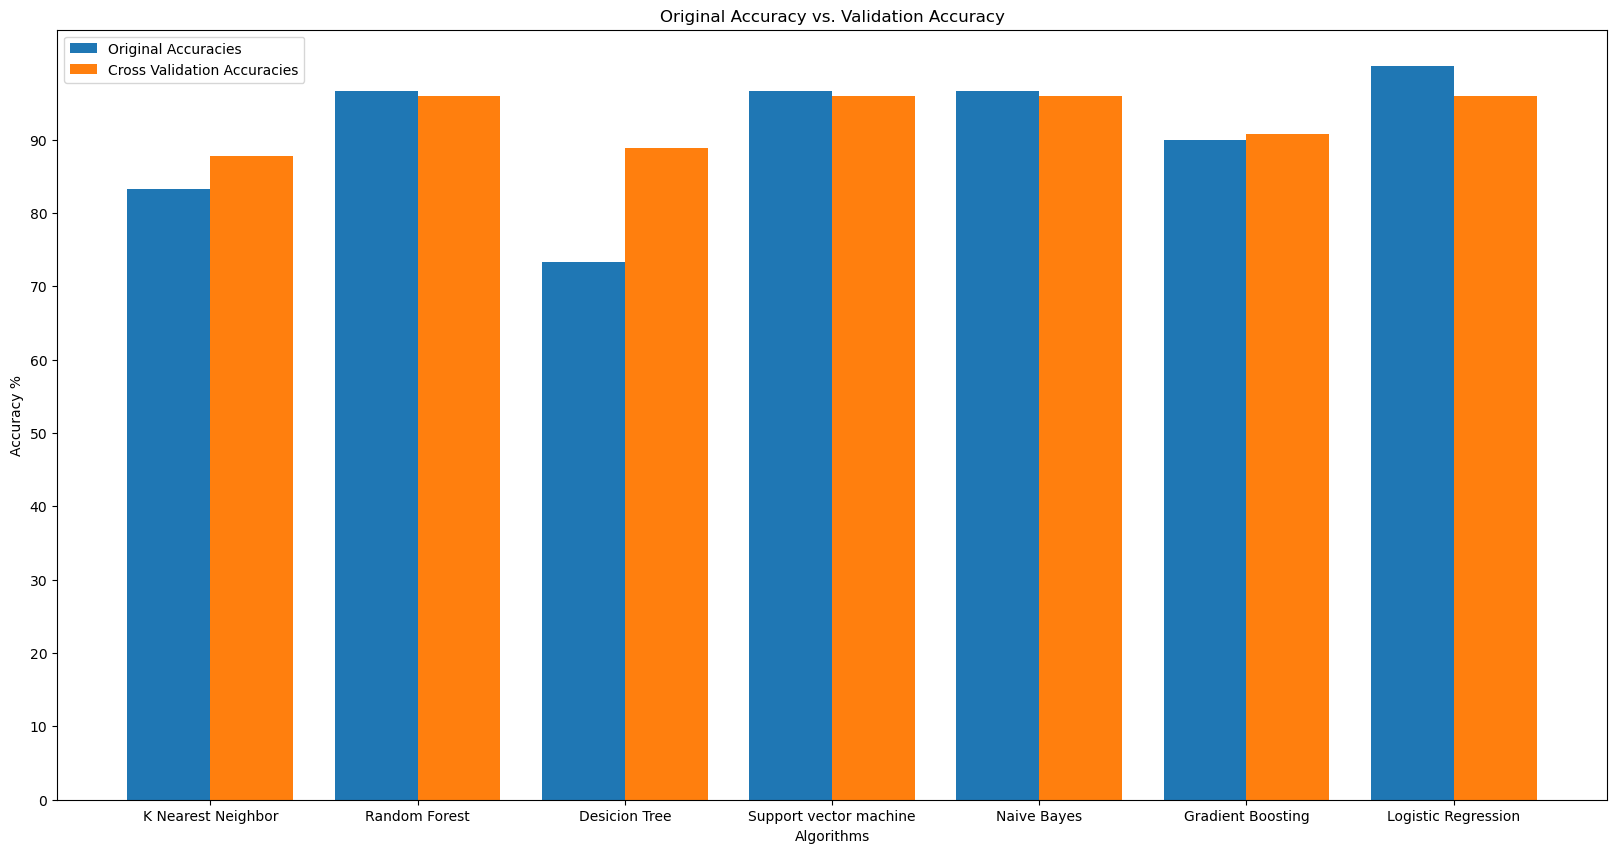

In [208]:
#plot change in accuracy
plt.style.use('default')
plt.figure(figsize=(20,10))
labels = list(dic.keys())
after = list(dic.values())
before = list(accuracies.values())

X_axis = np.arange(len(labels))
plt.bar(X_axis - 0.2, before, 0.4, label = 'Original Accuracies')
plt.bar(X_axis + 0.2, after, 0.4, label = 'Cross Validation Accuracies')
  
plt.xticks(X_axis, labels)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy %")
plt.title("Original Accuracy vs. Validation Accuracy")
plt.legend()
plt.yticks(np.arange(0,100,10))
plt.show()


In [209]:
#same process for AUROC, except use stratified k-fold data that has been split
r_probsCross = [0 for _ in range (len(test2))]
rf_probsCross = rf.predict_proba(test1)
nb_probsCross = nb.predict_proba(test1)
knn_probsCross = knn.predict_proba(test1)
dtc_probsCross = knn.predict_proba(test1)
svm_probsCross = svm.predict_proba(test1)
gb_probsCross = gb.predict_proba(test1)
lr_probsCross = lr.predict_proba(test1)

In [210]:
rf_probsCross = rf_probsCross[:, 1]
nb_probsCross = nb_probsCross[:, 1]
knn_probsCross = knn_probsCross[:, 1]
dtc_probsCross = dtc_probsCross[:, 1]
svm_probsCross = svm_probsCross[:, 1]
gb_probsCross = gb_probsCross[:, 1]
lr_probsCross = lr_probsCross[:, 1]

In [211]:
r_aucCross = roc_auc_score(test2, r_probsCross)
rf_aucCross = roc_auc_score(test2, rf_probsCross)
nb_aucCross = roc_auc_score(test2, nb_probsCross)
knn_aucCross = roc_auc_score(test2,knn_probsCross)
dtc_aucCross = roc_auc_score(test2,dtc_probsCross)
svm_aucCross = roc_auc_score(test2,svm_probsCross)
gb_aucCross = roc_auc_score(test2,gb_probsCross)
lr_aucCross = roc_auc_score(test2,lr_probsCross)

In [212]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_aucCross))
print('Random Forest: AUROC = %.3f' % (rf_aucCross))
print('Naive Bayes: AUROC = %.3f' % (nb_aucCross))
print('K nearest Neighbor: AUROC = %.3f' % (knn_aucCross))
print('Desicion Tree: AUROC = %.3f' % (dtc_aucCross))
print('Support Vector Machine: AUROC = %.3f' % (svm_aucCross))
print('Gradient Boosting: AUROC = %.3f' % (gb_aucCross))
print('Logistic Regression: AUROC = %.3f' % (lr_aucCross))


Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.980
Naive Bayes: AUROC = 0.996
K nearest Neighbor: AUROC = 0.965
Desicion Tree: AUROC = 0.965
Support Vector Machine: AUROC = 0.988
Gradient Boosting: AUROC = 0.957
Logistic Regression: AUROC = 0.992


In [213]:
r_fprCross, r_tprCross, _ = roc_curve(test2, r_probsCross)
rf_fprCross, rf_tprCross, _ = roc_curve(test2, rf_probsCross)
nb_fprCross, nb_tprCross, _ = roc_curve(test2, nb_probsCross)
knn_fprCross, knn_tprCross, _ = roc_curve(test2, knn_probsCross)
dtc_fprCross, dtc_tprCross, _ = roc_curve(test2, dtc_probsCross)
svm_fprCross, svm_tprCross, _ = roc_curve(test2, svm_probsCross)
gb_fprCross, gb_tprCross, _ = roc_curve(test2, gb_probsCross)
lr_fprCross, lr_tprCross, _ = roc_curve(test2, lr_probsCross)

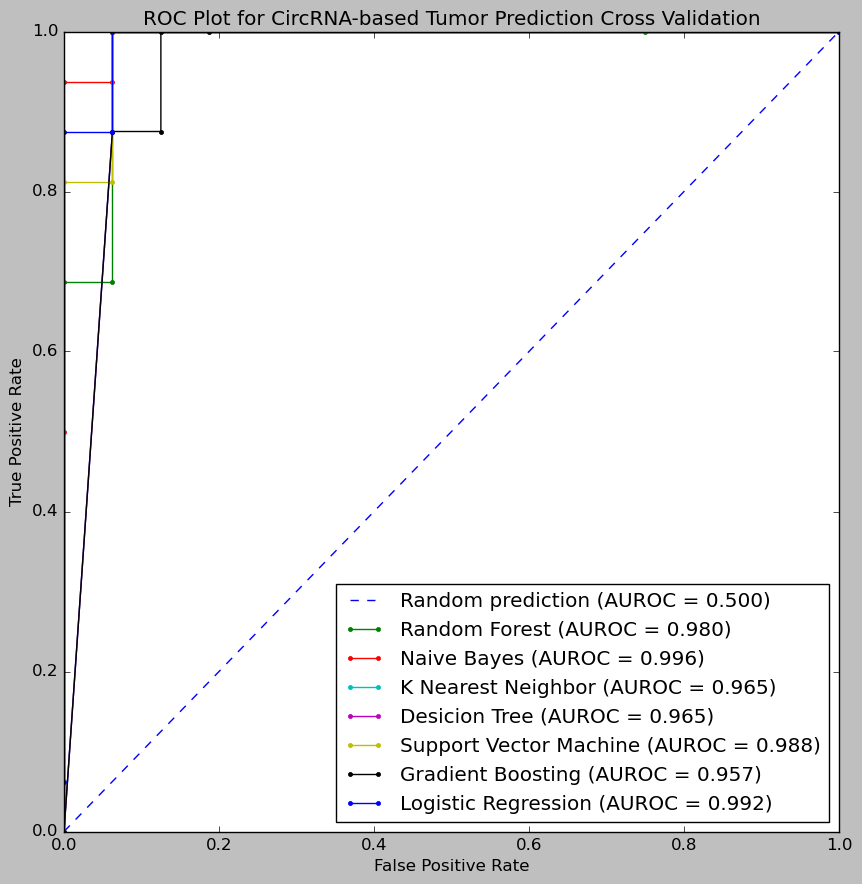

In [214]:
plt.style.use('classic')
plt.figure(figsize=(10, 10), dpi=100)
plt.plot(r_fprCross, r_tprCross, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_aucCross)
plt.plot(rf_fprCross, rf_tprCross, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_aucCross)
plt.plot(nb_fprCross, nb_tprCross, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_aucCross)
plt.plot(knn_fprCross, knn_tprCross, marker='.', label='K Nearest Neighbor (AUROC = %0.3f)' % knn_aucCross)
plt.plot(dtc_fprCross, dtc_tprCross, marker='.', label='Desicion Tree (AUROC = %0.3f)' % dtc_aucCross)
plt.plot(svm_fprCross, svm_tprCross, marker='.', label='Support Vector Machine (AUROC = %0.3f)' % svm_aucCross)
plt.plot(gb_fprCross, gb_tprCross, marker='.', label='Gradient Boosting (AUROC = %0.3f)' % gb_aucCross)
plt.plot(lr_fprCross, lr_tprCross, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_aucCross)
# Title
plt.title('ROC Plot for CircRNA-based Tumor Prediction Cross Validation')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc = 'lower right' )
# Show plot
plt.show()